In [65]:
import warnings
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from scipy import stats
import datetime as dt


warnings.filterwarnings('ignore')

### A: summarize the data

Below is the Count of all columns for each row. As we can see below there are a total of 1949 rows, however some of these rows have empty values for their columns which is evident in the lower counts for some columns such as log GDP per capita and Health Life expectancy at birth. To handle missing values, rows with NaN will be dropped


NOTE: dropping year as specified in the instructions

In [66]:
df = pd.read_csv('Gold_Price_Prediction.csv').dropna()
print(df.count())

Date                                      657
Price 2 Days Prior                        657
Price 1 Day Prior                         657
Price Today                               657
Price Tomorrow                            657
Price Change Tomorrow                     657
Price Change Ten                          657
Std Dev 10                                657
Twenty Moving Average                     657
Fifty Day Moving Average                  657
200 Day Moving Average                    657
Monthly Inflation Rate                    657
EFFR Rate                                 657
Volume                                    657
Treasury Par Yield Month                  657
Treasury Par Yield Two Year               657
Treasury Par Yield Curve Rates (10 Yr)    657
DXY                                       657
SP Open                                   657
VIX                                       657
Crude                                     657
dtype: int64


All values in this df are continuos except date, which must be preprocessed to work with the regressor. 

### B. Displaying statistical values

mean, std, and minimums of all colums

In [67]:

df = df.drop(columns=['Date'])
df.describe()

,Price 2 Days Prior,Price 1 Day Prior,Price Today,Price Tomorrow,Price Change Tomorrow,Price Change Ten,Std Dev 10,Twenty Moving Average,Fifty Day Moving Average,200 Day Moving Average,Monthly Inflation Rate,EFFR Rate,Volume,Treasury Par Yield Month,Treasury Par Yield Two Year,Treasury Par Yield Curve Rates (10 Yr),DXY,SP Open,VIX,Crude
count,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000
mean,1951.381187,1952.270837,1953.152055,1953.986058,0.834003,8.803729,20.863734,1936.930839,1887.037351,1635.712298,5.418417,3.704566,95.094368,3.920365,4.017686,3.668706,103.952374,4400.939482,19.890609,84.588950
std,186.632169,187.421972,188.164180,188.775030,17.540820,55.987162,10.488786,195.797946,281.779563,511.351177,2.247698,1.975238,15.533704,1.964308,1.025270,0.742201,3.364053,490.096107,6.102989,11.956944
min,1627.040000,1627.040000,1627.040000,1627.040000,-81.890000,-124.290000,5.587177,905.140000,362.056000,90.514000,3.000000,0.080000,41.000000,0.020000,0.990000,1.720000,94.870000,3520.370000,11.530000,66.620000
25%,1825.180000,1825.180000,1825.680000,1825.990000,-9.130000,-29.790000,13.623854,1832.974500,1802.300400,1603.688500,3.200000,2.330000,84.000000,2.440000,3.450000,3.290000,102.380000,4015.540000,14.190000,76.600000
50%,1930.450000,1931.370000,1931.440000,1931.590000,0.660000,2.730000,18.157417,1927.895500,1919.305000,1814.876550,4.900000,4.830000,96.000000,4.700000,4.390000,3.820000,104.010000,4327.010000,19.080000,81.270000
75%,2019.010000,2019.700000,2020.380000,2020.740000,10.900000,42.390000,25.419096,2008.937000,1992.177800,1949.583150,7.900000,5.330000,104.000000,5.510000,4.740000,4.240000,105.520000,4602.860000,24.070000,89.020000
max,2469.650000,2469.650000,2469.650000,2469.650000,66.660000,186.170000,62.183588,2387.020000,2363.055800,2168.256150,9.100000,5.330000,144.000000,6.020000,5.190000,4.980000,114.190000,5644.090000,37.500000,124.660000


array([[<Axes: title={'center': 'Price 2 Days Prior'}>,
        <Axes: title={'center': 'Price 1 Day Prior'}>,
        <Axes: title={'center': 'Price Today'}>,
        <Axes: title={'center': 'Price Tomorrow'}>],
       [<Axes: title={'center': 'Price Change Tomorrow'}>,
        <Axes: title={'center': 'Price Change Ten'}>,
        <Axes: title={'center': 'Std Dev 10'}>,
        <Axes: title={'center': 'Twenty Moving Average'}>],
       [<Axes: title={'center': 'Fifty Day Moving Average'}>,
        <Axes: title={'center': '200 Day Moving Average'}>,
        <Axes: title={'center': 'Monthly Inflation Rate'}>,
        <Axes: title={'center': 'EFFR Rate'}>],
       [<Axes: title={'center': 'Volume '}>,
        <Axes: title={'center': 'Treasury Par Yield Month'}>,
        <Axes: title={'center': 'Treasury Par Yield Two Year'}>,
        <Axes: title={'center': 'Treasury Par Yield Curve Rates (10 Yr)'}>],
       [<Axes: title={'center': 'DXY'}>,
        <Axes: title={'center': 'SP Open'}>,
 

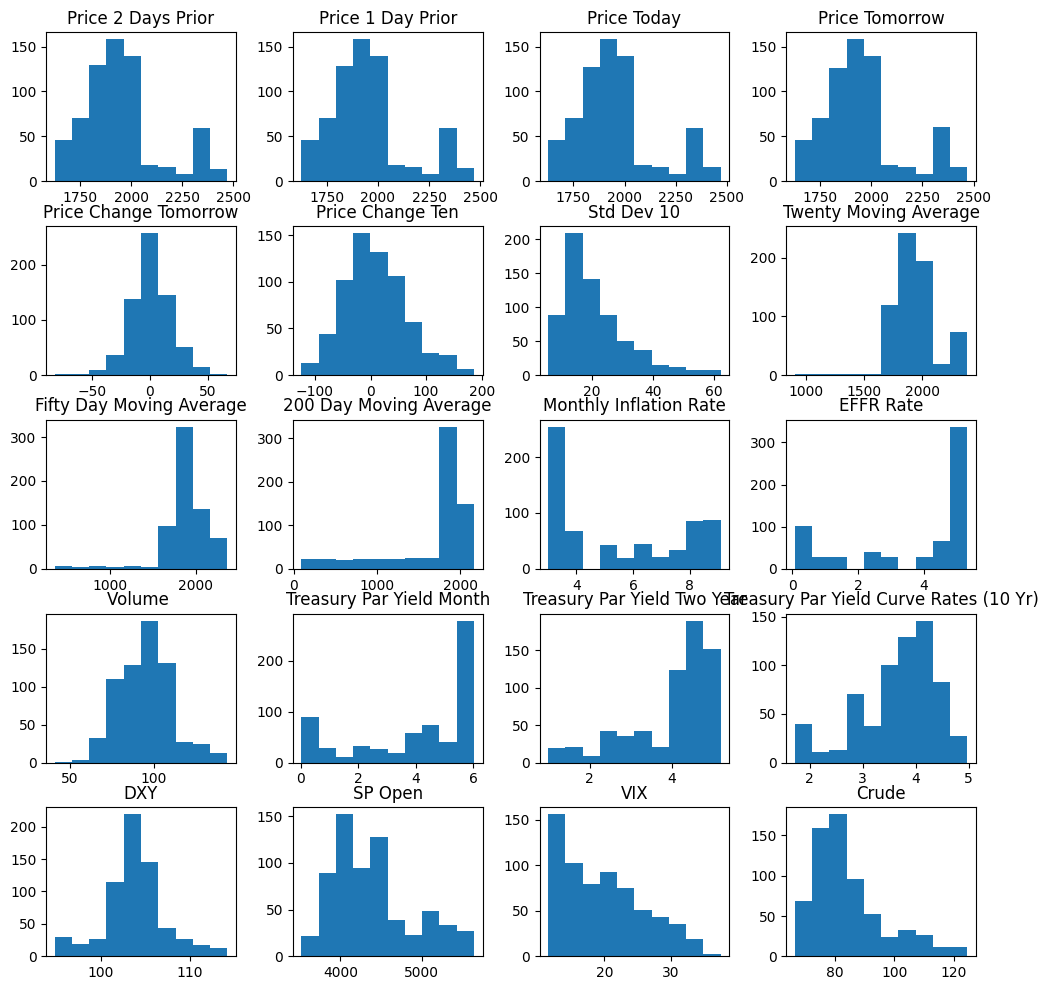

In [68]:
df.hist( grid=False, figsize=(12,12))

Observations on the data:

A majority of values seem to be along a gaussian disttribution. EFFR rate, Treasurey par Yield rates and 200 days average are examples of skewed datasets

### C. Exploring Relationships Between Columns

Correlation between continuos columns

<Axes: >

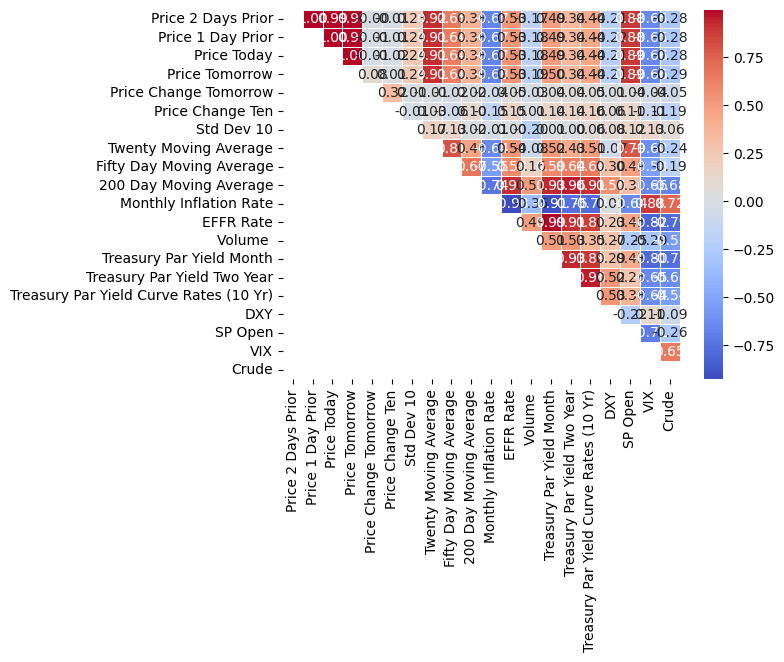

In [69]:
correlation_matrix = df.corr()
mask = np.tril(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

Because of the immense amount of 

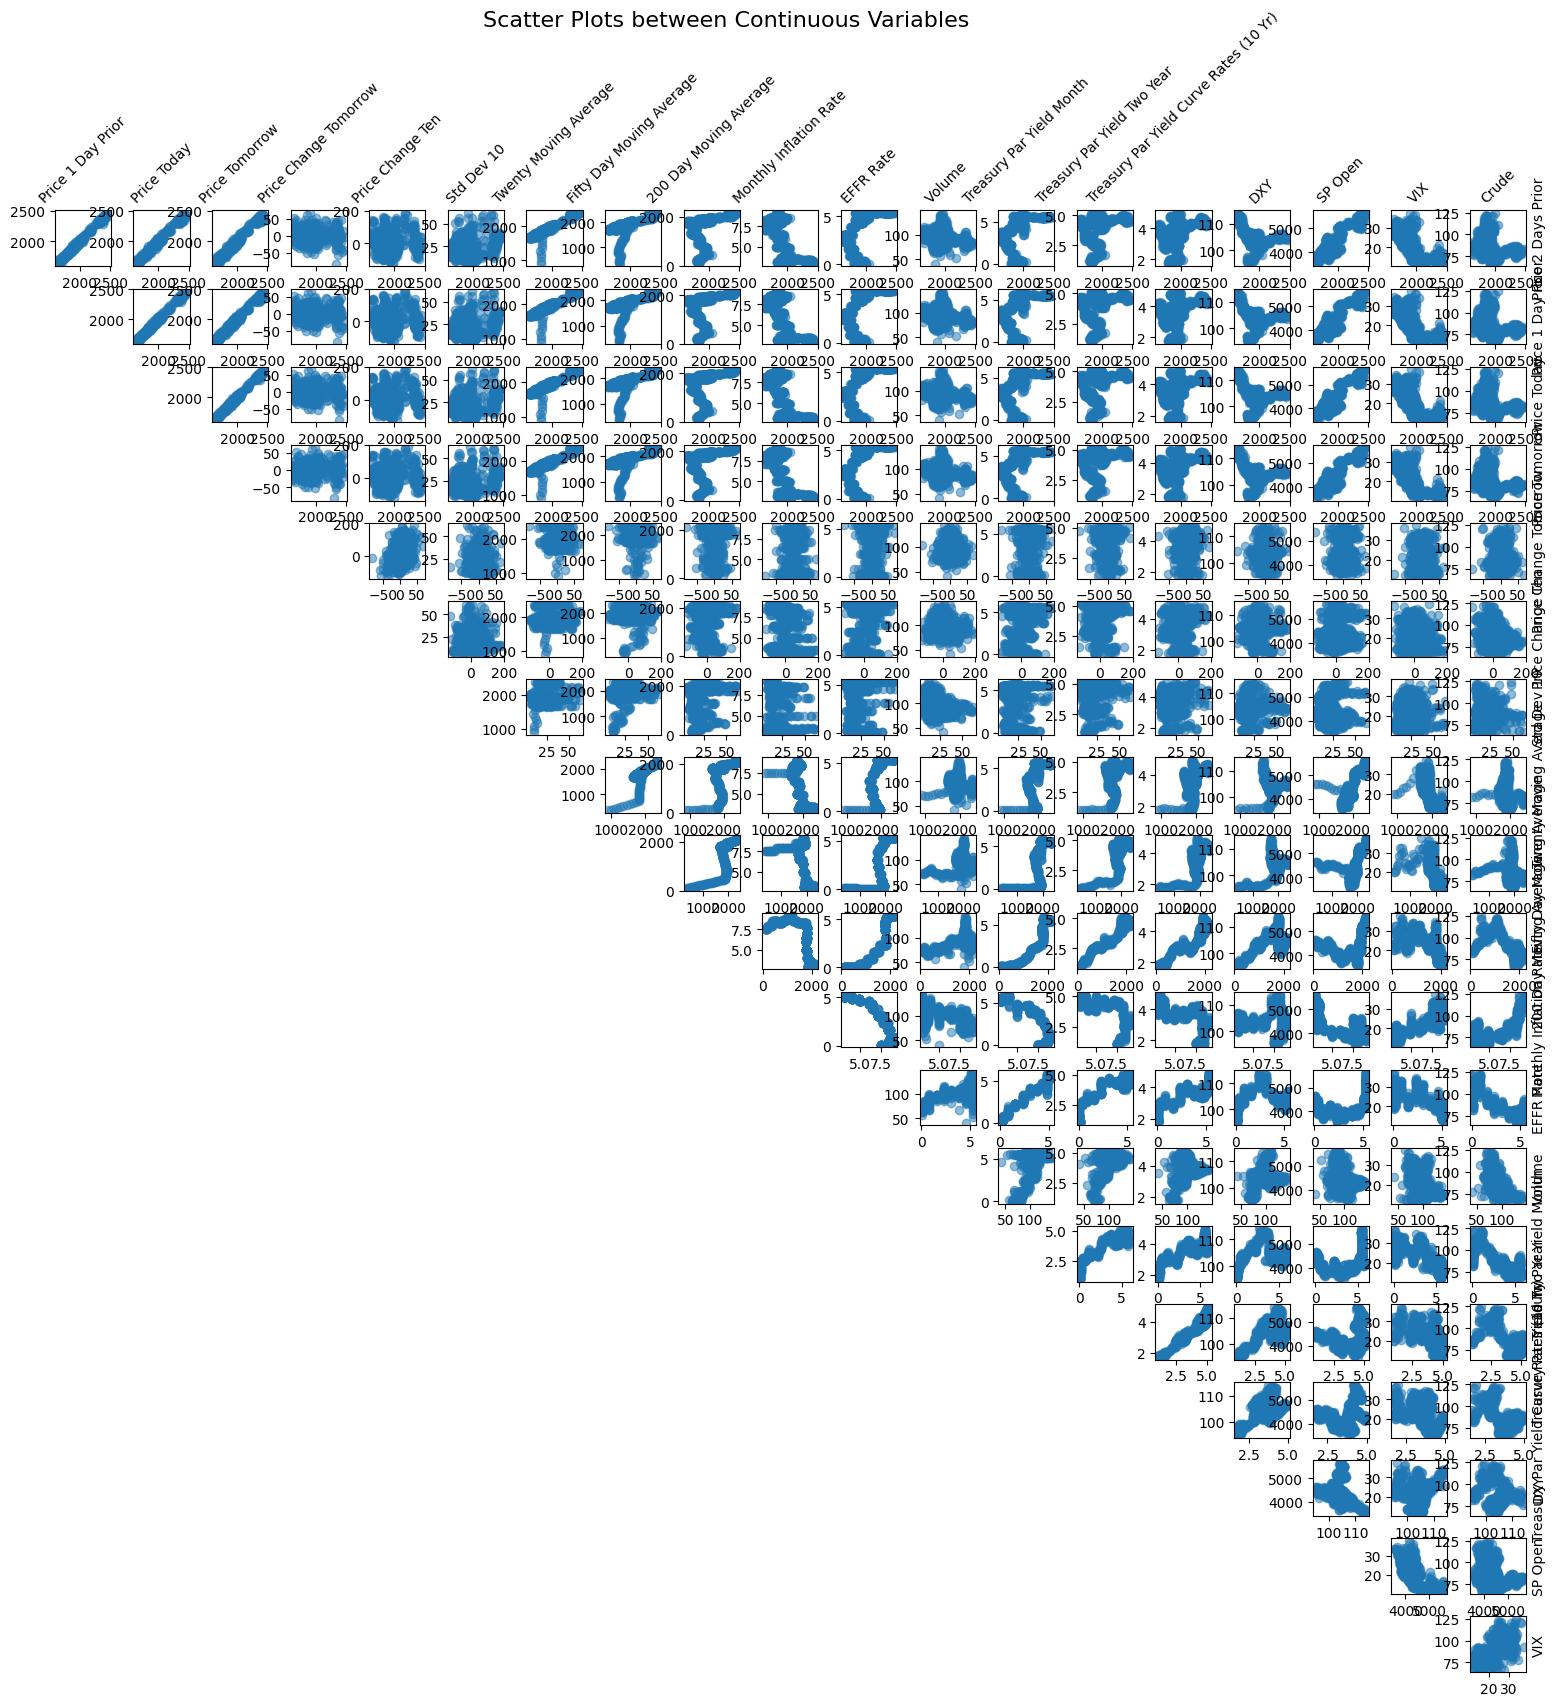

In [70]:
cols = df.columns.tolist()
num_cols = len(cols)

# Set the size of the grid
fig, axes = plt.subplots(nrows=num_cols, ncols=num_cols, figsize=(20, 20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(num_cols):
    for j in range(num_cols):
        # Only plot in the upper triangle (when column index j > i)
        if i < j: 
            col1 = cols[i]
            col2 = cols[j]
            axes[i, j].scatter(df[col1], df[col2], alpha=0.5)
            
            # Set labels for the x and y axes
            if i == 0:
                axes[i, j].set_title(col2, fontsize=10, rotation=45)
            if j == num_cols - 1:
                axes[i, j].set_ylabel(col1, fontsize=10,)
                axes[i, j].yaxis.set_label_position("right")

        else:
            axes[i, j].set_visible(False) 


for i in range(num_cols):
    axes[num_cols-1, i].set_xlabel(cols[i], fontsize=10)


plt.suptitle('Scatter Plots between Continuous Variables', fontsize=16)
plt.show()

In [71]:
cols = df.columns.tolist()
num_cols = len(cols)

results = []
for i in range(num_cols):
    for j in range(num_cols):
        # Only plot in the upper triangle (when column index j > i)
        if i < j: 
            col1 = cols[i]
            col2 = cols[j]
            stat, p_value = stats.pearsonr(df[col1], df[col2])

            results.append({
                'col1': col1,
                'col2': col2,
                'Statistic': stat,
                'p_value': p_value

            })
            

stats = pd.DataFrame(results)
stats

,col1,col2,Statistic,p_value
0,Price 2 Days Prior,Price 1 Day Prior,0.995640,0.000000e+00
1,Price 2 Days Prior,Price Today,0.991646,0.000000e+00
2,Price 2 Days Prior,Price Tomorrow,0.988165,0.000000e+00
3,Price 2 Days Prior,Price Change Tomorrow,-0.002936,9.401218e-01
4,Price 2 Days Prior,Price Change Ten,-0.014231,7.157911e-01
...,...,...,...,...
185,DXY,VIX,0.111934,4.070333e-03
186,DXY,Crude,-0.086338,2.690221e-02
187,SP Open,VIX,-0.706618,1.790960e-100
188,SP Open,Crude,-0.257902,1.921972e-11


Discussion:


From observing both the scatter plots and the pearson correlation between all columns of the dataframe. Since we are predicting life ladder, we will focus on the first row of the scatter plot and the first eight entries of the spread sheet. Log GDP per capita and Healthy life Expectancy at Birth both seem to appear positvely and strongly correlated with life ladder. These suspicions are confirmed when observing the high correlation statistic as well as p_values below a threshold of 1e-6. The table also gives insighht that Social support also has strong correlation with Life Ladder. These columns could provide useful when performing linear regression of Life Ladder

### D. Select 25% of the data for testing

Splitting the data into 75-25 split we check the validity by checking the similarity between the train and test data

In [72]:

X = df.drop(columns=['Price Today'], axis=1).values
y = df['Price Today'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=99)

                                                    
print("Compating means of splits")
print(f"X_train:  {np.mean(X_train)}")
print(f"X_test:   {np.mean(X_test)}")

print(f"y_train:  {np.mean(y_train)}")
print(f"y_test:   {np.mean(y_test)}")

# Scaling values
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)


Compating means of splits
X_train:  845.6760249671546
X_test:   846.7597262789089
y_train:  1953.7595528455286
y_test:   1951.3406060606058


### E. Training linear regression models

closed form using the normal equation, cross validation using K folds 

In [73]:
def normal_equation_Kfolds(X):

    kf = KFold(n_splits=3)
    mse_scores = []

    X_b = np.c_[np.ones((X.shape[0], 1)), X]

    for train_index, val_index in kf.split(X_b):
        X_train_fold, X_val_fold = X_b[train_index], X_b[val_index]
        y_train_fold, y_val_fold = y[train_index], y[val_index]


        theta_best = np.linalg.inv(X_train_fold.T.dot(X_train_fold)).dot(X_train_fold.T).dot(y_train_fold)
        y_val_pred = X_val_fold.dot(theta_best)

        mse = mean_squared_error(y_val_fold, y_val_pred)
        mse_scores.append(mse)


    mean_mse = np.mean(mse_scores)

    print(f'Mean 3-Fold Cross-Validation MSE (Normal Equation): {mean_mse:.3f}')


normal_equation_Kfolds(X)

Mean 3-Fold Cross-Validation MSE (Normal Equation): 0.000


SGD regressor using different regulation techiques

In [74]:

def test_regularization(scaled_X_train, y_train):
        penalities = [None, 'l1', 'l2', 'elasticnet']
        penalty_names = {
                'l1': 'lasso',
                'l2' : 'ridge'
        }

        print("Testing Different Penalty Types")
        for penalty in penalities:
                # assume CV will automatically split the training set into train and validation
                sgd = SGDRegressor(max_iter=1000, alpha=0.1, penalty=penalty, random_state=99)
                cv_scores = cross_val_score(sgd, scaled_X_train, y_train, cv=3, scoring='neg_mean_squared_error')
                average_mse  = -cv_scores.mean()
                        
                penalty_display = penalty_names.get(penalty, penalty)
                print(f'{penalty_display}: {average_mse: .3f}')


test_regularization(scaled_X_train, y_train)


Testing Different Penalty Types
None:  17.569
lasso:  15.602
ridge:  339.664
elasticnet:  318.273


Discussion:


We notice that ridge and elastic net are out performing lasso regression. This could be a result of lasso regulation is performing feature selection by reducing the weight of some columns to 0. Where as Ridge Regularization is reducing all of the weights in equally.

Other Hyper Parameters
 - learning rate
 - batch size 
 - iteration to mse

In [75]:
def test_learning_rates(scaled_X_train, y_train):
    learning_rates = ['constant', 'optimal', 'invscaling', 'adaptive']

    print("Testing Learning rate")
    for rate in learning_rates:
        sgd = SGDRegressor(max_iter=1000, penalty=None, random_state=99, learning_rate=rate)
        cv_scores = cross_val_score(sgd, scaled_X_train, y_train, cv=3, scoring='neg_mean_squared_error')
        average_mse  = -cv_scores.mean()
            
        print(f'{rate}: {average_mse:.3f}')


test_learning_rates(scaled_X_train, y_train)

Testing Learning rate
constant: 0.085
optimal: 4728050639418084598743040.000
invscaling: 17.569
adaptive: 0.083


Discussion:


We notice that the optimal learning rate is performing much worse than the others. This could be a result of how the scaling is performed

In [76]:
# Further split in to validation set
X_train , X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=99)


scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_val = scaler.transform(X_val)

In [77]:

def test_batch_size(scaled_X_train, y_train, scaled_X_val, y_val):
    batch_sizes = [4, 16, 32, 64, 128, 256]
    learning_rate = 'adaptive'
    N = len(scaled_X_train)

    for batch_size in batch_sizes:

        model = SGDRegressor(max_iter=1000, learning_rate=learning_rate, eta0=0.001)

        for epoch in range(10):

            shuffled_indices = np.random.permutation(N)
            scaled_X_train_shuffled = scaled_X_train[shuffled_indices]
            y_train_shuffled = y_train[shuffled_indices]

            for i in range(0, N, batch_size):
                start_index = i
                end_index = min(start_index + batch_size, N) 
                X_batch = scaled_X_train_shuffled[start_index:end_index]
                y_batch = y_train_shuffled[start_index:end_index]
                model.partial_fit(X_batch, y_batch)

        predictions = model.predict(scaled_X_val)
        mse = mean_squared_error(y_val, predictions)
        print(f'Batch Size: {batch_size}, Learning Rate: {learning_rate}, MSE: {mse:.4f}')


test_batch_size(scaled_X_train, y_train, scaled_X_val, y_val)

Batch Size: 4, Learning Rate: adaptive, MSE: 1596.1215
Batch Size: 16, Learning Rate: adaptive, MSE: 1582.6819
Batch Size: 32, Learning Rate: adaptive, MSE: 1634.7340
Batch Size: 64, Learning Rate: adaptive, MSE: 1599.2234
Batch Size: 128, Learning Rate: adaptive, MSE: 1566.0832
Batch Size: 256, Learning Rate: adaptive, MSE: 1579.5278


Discussion:


From the given batch sizes it seems that the results are converging to similar parameters resulting in similar MSE scores. 

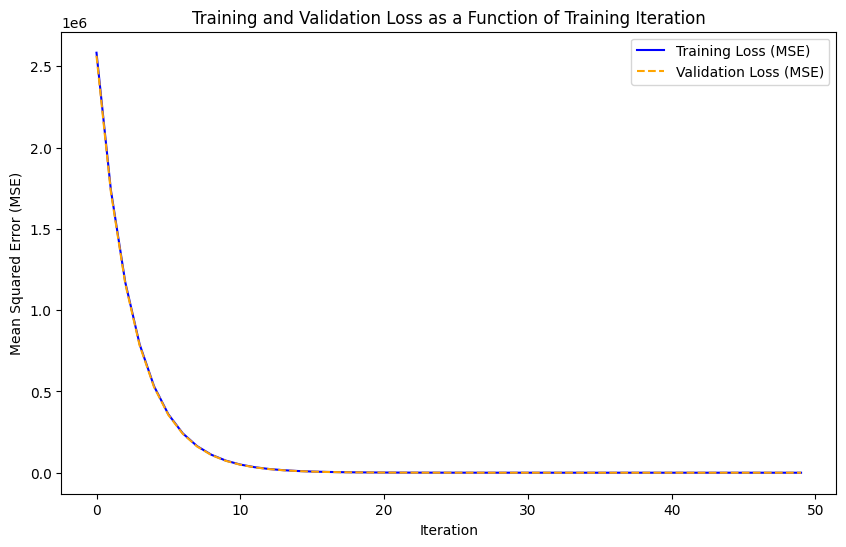

In [78]:


def test_train_val_error(scaled_X_train, y_train, scaled_X_val, y_val):
    sgd_reg = SGDRegressor(warm_start=True, tol=None,
                        penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

    n_epochs = 50
    train_errors, val_errors = [], []
    for epoch in range(n_epochs):
        sgd_reg.partial_fit(scaled_X_train, y_train)
        y_train_pred = sgd_reg.predict(scaled_X_train)
        y_val_pred = sgd_reg.predict(scaled_X_val)
        train_errors.append(mean_squared_error(y_train, y_train_pred))
        val_errors.append(mean_squared_error(y_val, y_val_pred))

    best_epoch = np.argmin(val_errors)
    best_val_rmse = np.sqrt(val_errors[best_epoch])

    # Plot the training and validation MSE as a function of training iterations
    plt.figure(figsize=(10, 6))
    plt.plot(train_errors, label='Training Loss (MSE)', color='blue')
    plt.plot(val_errors, label='Validation Loss (MSE)', color='orange', linestyle='--')
    plt.xlabel('Iteration')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.title('Training and Validation Loss as a Function of Training Iteration')
    plt.legend()
    plt.show()


test_train_val_error(scaled_X_train, y_train, scaled_X_val, y_val)



### F. Polynomial features

In [79]:

X = df.drop('Price Today', axis=1).values
y = df['Price Today'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

pipeline = Pipeline([
        ('poly_features', PolynomialFeatures(degree=2)),
        ('scaler', StandardScaler()), ])

scaled_X_train = pipeline.fit_transform(X_train)
scaled_X_test = pipeline.transform(X_test)



In [80]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
normal_equation_Kfolds(X_poly)

Mean 3-Fold Cross-Validation MSE (Normal Equation): 0.002


In [81]:

test_regularization(scaled_X_train, y_train)

Testing Different Penalty Types


None:  44.365
lasso:  16.687
ridge:  134.771
elasticnet:  124.836


Discussion:


we are seeing similar patterns to the non polynomial version, where the lass regression performs slightly worse. This implies that although one feature may have small impact, the consideration of this into the model helps fine tune accuracy

In [82]:

test_learning_rates(scaled_X_train, y_train)



Testing Learning rate
constant: 1486790866903555710648320.000
optimal: 882752925830149736654438400.000
invscaling: 44.365
adaptive: 39743546616144568320.000


Discussion:

We notice very strange begavior of the optimal learning rate, resulting in the model overfitting, and diverging from the true local minima

In [83]:

X_train , X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=99)

pipeline = Pipeline([
        ('poly_features', PolynomialFeatures(degree=2)),
        ('scaler', StandardScaler()), ])

scaled_X_train = pipeline.fit_transform(X_train)
scaled_X_val = pipeline.transform(X_val)


In [84]:

test_batch_size(scaled_X_train, y_train, scaled_X_val, y_val)

Batch Size: 4, Learning Rate: adaptive, MSE: 836.3188
Batch Size: 16, Learning Rate: adaptive, MSE: 926.5233
Batch Size: 32, Learning Rate: adaptive, MSE: 906.4827
Batch Size: 64, Learning Rate: adaptive, MSE: 917.6926
Batch Size: 128, Learning Rate: adaptive, MSE: 1033.2241
Batch Size: 256, Learning Rate: adaptive, MSE: 930.1818


Discussion: We notice that a similar pattern where batch size does not strongly affect MSE, due to similar convergence behavior

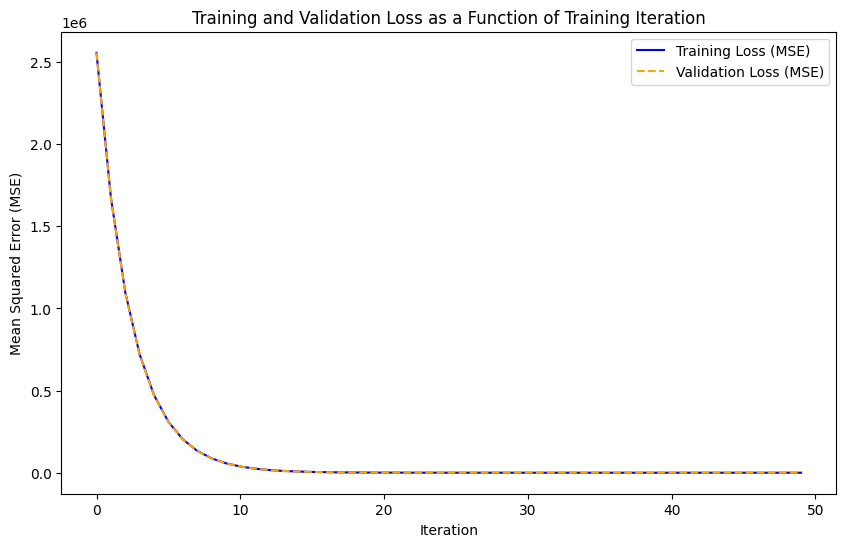

In [85]:

test_train_val_error(scaled_X_train, y_train, scaled_X_val, y_val)


### G. Predicting test values

choosing two the best polynomaial and std SGD model we compare on the test

In [86]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=99)

poly = Pipeline([
        ('poly_features', PolynomialFeatures(degree=2)),
        ('scaler', StandardScaler()), ])

scaled_X_train_poly = poly.fit_transform(X_train)
scaled_X_test_poly = poly.transform(X_test)

scaler = StandardScaler()
scaled_X_train_st = scaler.fit_transform(X_train)
scaled_X_test_st = scaler.transform(X_test)




In [87]:
sgd = SGDRegressor(max_iter=1000, penalty='l2', random_state=99, learning_rate='adaptive')
sgd.fit(scaled_X_train_st, y_train)
pred = sgd.predict(scaled_X_test_st)
mse = mean_squared_error(y_test, pred)

print("Non Polynomial SGD Regressor")
print(f"MSE: {mse}")

Non Polynomial SGD Regressor
MSE: 0.08641790686612719


In [89]:
sgd = SGDRegressor(max_iter=1000, penalty='l2', random_state=99, learning_rate='adaptive')
sgd.fit(scaled_X_train_poly, y_train)
pred = sgd.predict(scaled_X_test_poly)
mse = mean_squared_error(y_test, pred)

print("Polynomial SGD Regressor")
print(f"MSE: {mse}")

Polynomial SGD Regressor
MSE: 6.382411928634222e+19


Observations:

We notice a slight improvement when using a polynomial regressor of degree 2 , howvwer if we increase this to degree of 3, we see noticeable performance drop off. From the issues with the optimal learning rate I believe that the scaling of this notebook could be incorrect, hencing improving this would result in a better model. 